# Assignment 1

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from datetime import datetime

In [2]:
data = pd.read_csv("./uber.csv")
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
def convert_to_datetime(my_date_str):
    my_date_str = " ".join(my_date_str.split(" ")[0:2])
    my_date = datetime.strptime(my_date_str, '%Y-%m-%d %H:%M:%S')
    my_date = (my_date.hour + (my_date.minute / 60))
    return my_date

In [6]:
data['pickup_datetime'] = data['pickup_datetime'].apply(convert_to_datetime)

/tmp/ipykernel_7075/3661978297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pickup_datetime'] = data['pickup_datetime'].apply(convert_to_datetime)


<AxesSubplot:>

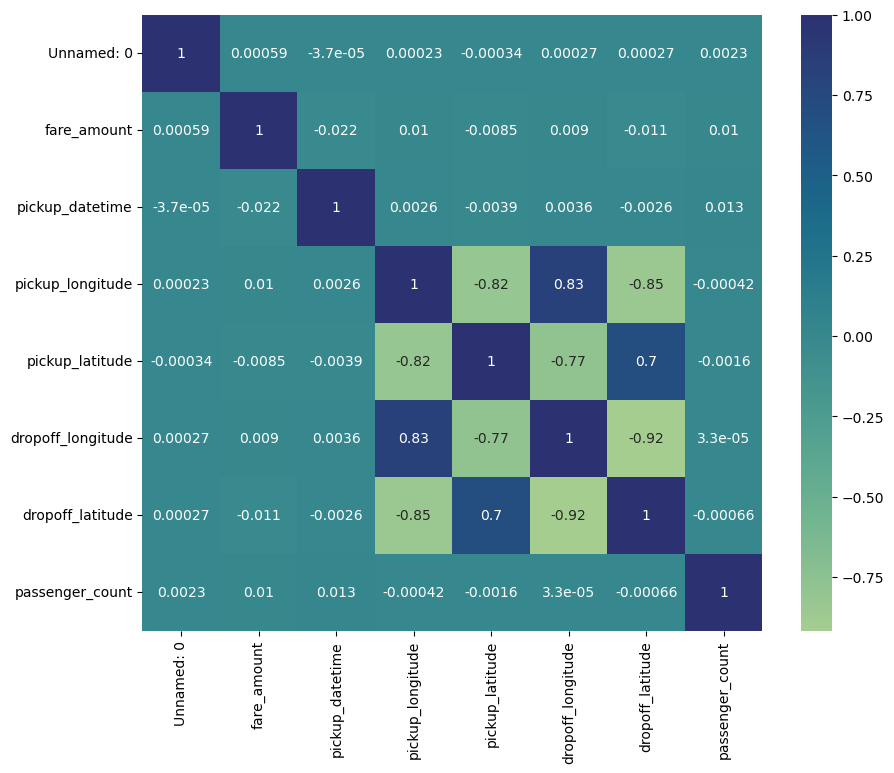

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='crest', annot=True)

In [8]:
X = data.drop(['Unnamed: 0', 'key', 'fare_amount'], axis=1)
y = data['fare_amount']

In [9]:
X

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,19.866667,-73.999817,40.738354,-73.999512,40.723217,1
1,20.066667,-73.994355,40.728225,-73.994710,40.750325,1
2,21.750000,-74.005043,40.740770,-73.962565,40.772647,1
3,8.366667,-73.976124,40.790844,-73.965316,40.803349,3
4,17.783333,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,10.816667,-73.987042,40.739367,-73.986525,40.740297,1
199996,1.150000,-73.984722,40.736837,-74.006672,40.739620,1
199997,0.700000,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.933333,-73.997124,40.725452,-73.983215,40.695415,1


In [10]:
sc = StandardScaler()
transformed_X = pd.DataFrame(sc.fit_transform(X))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((159999, 6), (40000, 6), (159999,), (40000,))

In [13]:
X_train

,0,1,2,3,4,5
125705,0.528915,-0.127653,0.103998,-0.110841,0.120524,-0.493902
148541,-0.102261,-0.130080,0.100826,-0.113070,0.119754,-0.493902
76283,0.792117,-0.127673,0.105212,-0.111274,0.119912,0.227604
85630,-0.304135,-0.126812,0.105654,-0.108841,0.124259,-0.493902
152342,-0.470234,-0.125333,0.106820,-0.109145,0.123984,-0.493902
...,...,...,...,...,...,...
171737,1.052765,-0.126937,0.108433,-0.110515,0.126924,-0.493902
199321,1.499954,-0.127306,0.104027,-0.112794,0.117054,0.949109
72600,0.764008,-0.110362,0.091668,-0.110238,0.126395,-0.493902
171907,-0.465123,-0.127564,0.103353,-0.109216,0.125443,-0.493902


## Linear Regression

In [14]:
model = LinearRegression(n_jobs=-1)

In [15]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [16]:
y_pred = model.predict(X_test)

In [17]:
r2_score(y_test, y_pred)

0.00077451997030209

In [18]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

9.64887852041469

## Decision Tree Regressor

In [19]:
dtr = DecisionTreeRegressor()

In [20]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
y_pred = dtr.predict(X_test)

In [22]:
r2_score(y_test, y_pred)

0.598783415050246

In [23]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [24]:
rmse

6.114128009949209

## Random Forest Regressor

In [25]:
rfr = RandomForestRegressor(verbose=1)

In [26]:
rfr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestRegressor(verbose=1)

In [27]:
y_pred = rfr.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


In [28]:
r2_score(y_test, y_pred)

0.7795508410537992

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

4.532098204005235